### Bike Sales Data Analysis (Kaggle Dataset)

In [1]:
#importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#importing sales data. Method used: pandas.read_csv()

df = pd.read_csv('/Users/maatoka/Tech Projects/Datasets/Bike Sales Data/sales_data.csv', parse_dates = ['Date'])

In [3]:
df.head(5) # default number of rows is 5

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


#### Understanding the data using basic methods

In [4]:
# see rows and cols - Method: shape
df.shape

(113036, 18)

In [5]:
# get basic stats about the data. Method used: describe()
df.describe() 

,Date,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,2014-11-23 12:14:55.063519232,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
min,2011-01-01 00:00:00,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,2013-12-22 00:00:00,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,2014-06-27 00:00:00,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,2016-01-09 00:00:00,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,2016-07-31 00:00:00,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000
std,NaN,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674


##### write here some observations from above

In [6]:
# get data column informations. Method used: info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

#### Data Cleaning

In [7]:
# check of there are any null values. Method used: isnull() and any()
df.isnull().any()

Date                False
Day                 False
Month               False
Year                False
Customer_Age        False
Age_Group           False
Customer_Gender     False
Country             False
State               False
Product_Category    False
Sub_Category        False
Product             False
Order_Quantity      False
Unit_Cost           False
Unit_Price          False
Profit              False
Cost                False
Revenue             False
dtype: bool

In [8]:
# get month column as int format
df['Purchase_Month'] = df['Date'].dt.month

In [9]:
#remove columns that are not needed. Method used: drop()

df.drop(['Day'], axis = 1, inplace = True)
df.drop(['Month'], axis = 1, inplace = True)


In [10]:
#rename year column
df = df.rename(columns= {'Year':"Purchase_Year"})

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Purchase_Year     113036 non-null  int64         
 2   Customer_Age      113036 non-null  int64         
 3   Age_Group         113036 non-null  object        
 4   Customer_Gender   113036 non-null  object        
 5   Country           113036 non-null  object        
 6   State             113036 non-null  object        
 7   Product_Category  113036 non-null  object        
 8   Sub_Category      113036 non-null  object        
 9   Product           113036 non-null  object        
 10  Order_Quantity    113036 non-null  int64         
 11  Unit_Cost         113036 non-null  int64         
 12  Unit_Price        113036 non-null  int64         
 13  Profit            113036 non-null  int64         
 14  Cost

#### Analysis - Let's answer some basic questions about the dataset

#### 1. What is the age distribution of customers?

In [12]:
df['Age_Group'].value_counts(normalize = True).round(4)*100

Age_Group
Adults (35-64)          49.39
Young Adults (25-34)    34.20
Youth (<25)             15.77
Seniors (64+)            0.65
Name: proportion, dtype: float64

<Axes: title={'center': 'Age Group Distirbution'}>

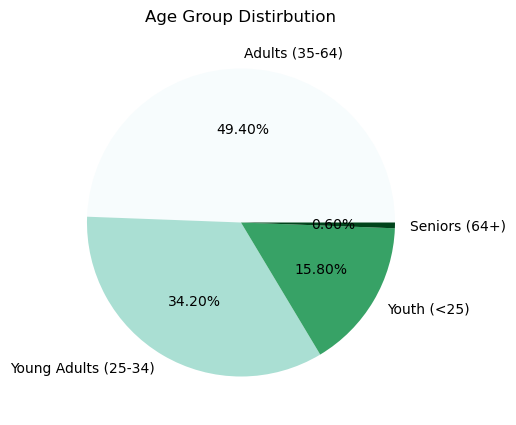

In [13]:
df['Age_Group'].value_counts(normalize = True).mul(100).round(1).plot(kind = 'pie', 
                                                                      autopct = '%.2f%%',
                                                                      cmap = 'BuGn', 
                                                                      figsize = (10,5), 
                                                                      title = "Age Group Distirbution",
                                                                      ylabel = "")

Almost 50% of the customers are adults i.e. 35 - 64 years old, followed by yong adults, youth and seniors.

#### 2. What is the most profitable year?

In [14]:
df.groupby('Purchase_Year')[['Profit', 'Revenue']].sum()

,Profit,Revenue
Purchase_Year,,
2011,2881301,8964888
2012,2951993,9175983
2013,5959208,15240037
2014,5864087,14152724
2015,7528563,20023991
2016,7035948,17713385


<Axes: title={'center': 'Profit & Revenue - Per year'}, xlabel='Purchase_Year'>

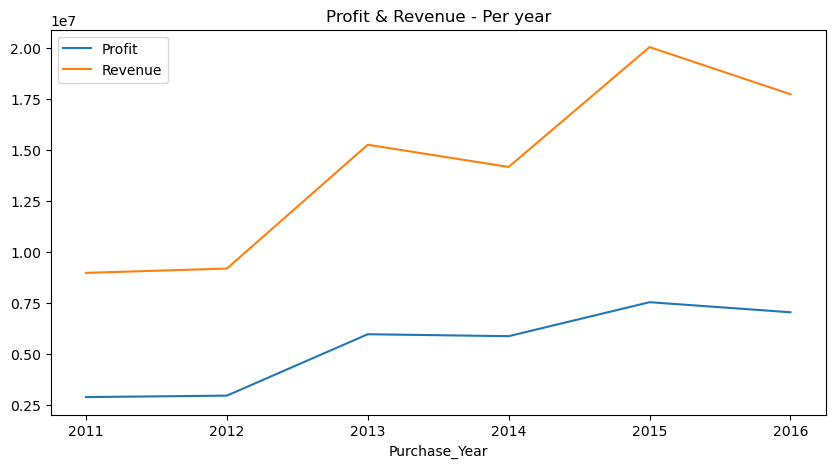

In [15]:
df.groupby('Purchase_Year')[['Profit', 'Revenue']].sum().plot(title = 'Profit & Revenue - Per year',
                                                    figsize = (10,5))

From the above graph, year 2015 has the highest revenue(\\$ 20,023,991) and the profit(\\$ 7,528,563). 

#### 3. What is the most profitable month each year ?

array([<Axes: title={'center': 'Purchase_Year'}, xlabel='Purchase_Year,Purchase_Month'>,
       <Axes: title={'center': 'Profit'}, xlabel='Purchase_Year,Purchase_Month'>],
      dtype=object)

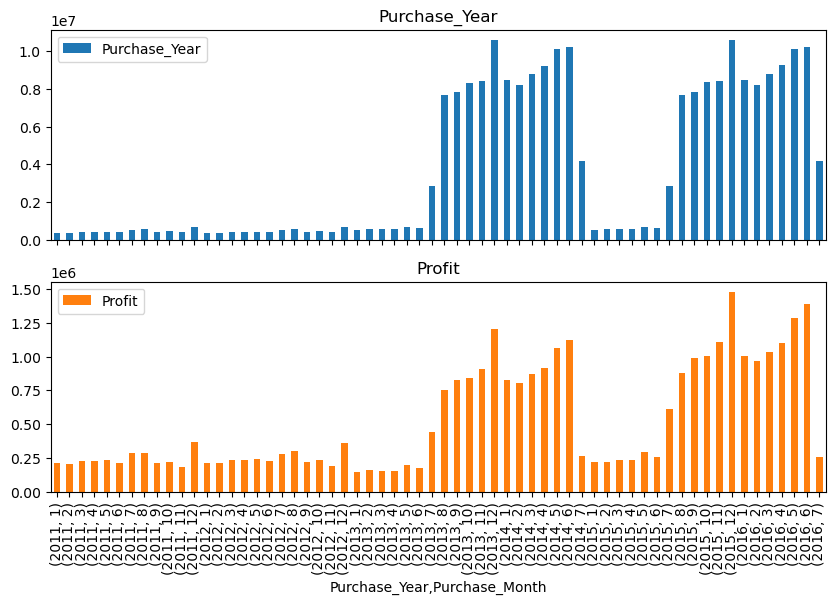

In [16]:
df.groupby(['Purchase_Year','Purchase_Month'])[['Purchase_Year','Profit']].sum().plot(kind = 'bar' ,legend = 'Purchase_Year', figsize = (10,6),
                                                                                      subplots = True)


#### 4. Which gender has the most order?

<Axes: title={'center': 'Order Quantity by Gender'}>

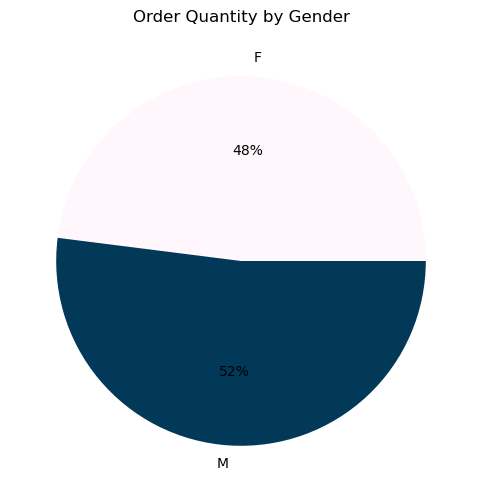

In [17]:
df.groupby('Customer_Gender')['Order_Quantity'].sum().plot(kind  = 'pie', figsize = (10,6), autopct = '%.0f%%',
                                                          cmap = 'PuBu', title = 'Order Quantity by Gender',
                                                          ylabel = '')

Both male and female have similar quantity of orders with male having slightly more orders.

#### 5. Which country generates the highest revenue?

<Axes: title={'center': 'Revenue by Country'}>

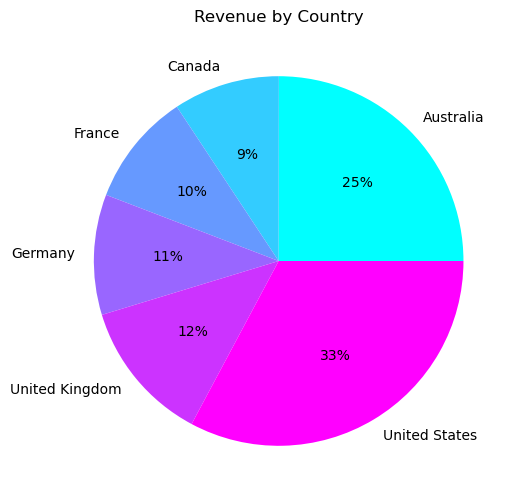

In [18]:
df.groupby('Country')['Revenue'].sum().plot(kind  = 'pie', figsize = (10,6), autopct = '%.0f%%',
                                                          cmap = 'cool', title = 'Revenue by Country',
                                                          ylabel = '')

United States has the highest revenue of 33% of the total value. 

#### 6. Top 5 states with highest revenue in the Unites States? 

#### 7. Which is the most profitable category?

<Axes: title={'center': 'Profit by Product Category'}, xlabel='Product_Category'>

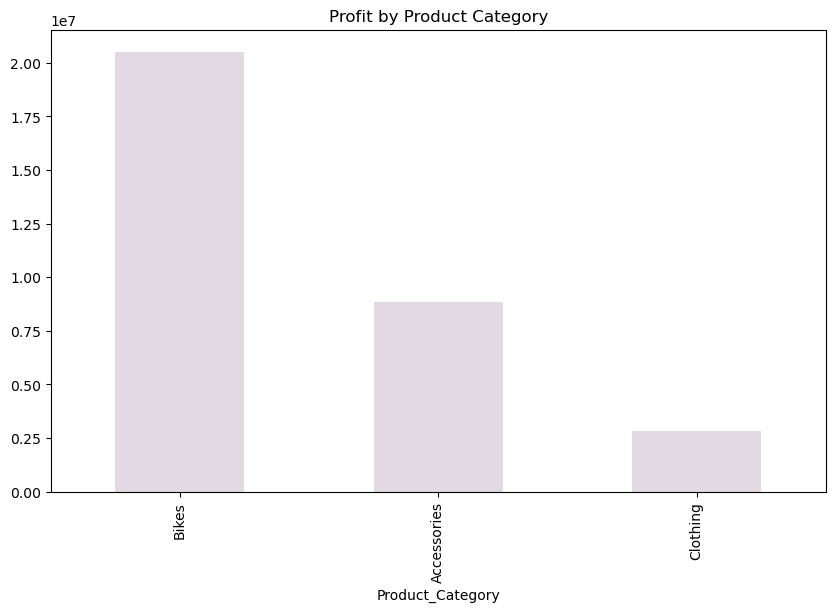

In [19]:
df.groupby('Product_Category')['Profit'].sum().sort_values(ascending = False).plot(kind = 'bar', figsize = (10,6), 
                                                          cmap = 'twilight', title = 'Profit by Product Category')

#### 8. Most profitable product subcategory

<Axes: xlabel='Sub_Category'>

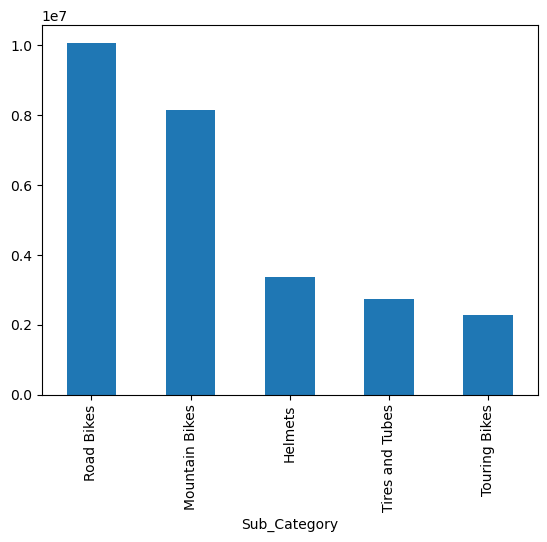

In [20]:
df.groupby('Sub_Category')['Profit'].sum().sort_values(ascending = False).head(5).plot(kind = 'bar')

#### 9. Correlation between Customer age and revenue?

<Axes: >

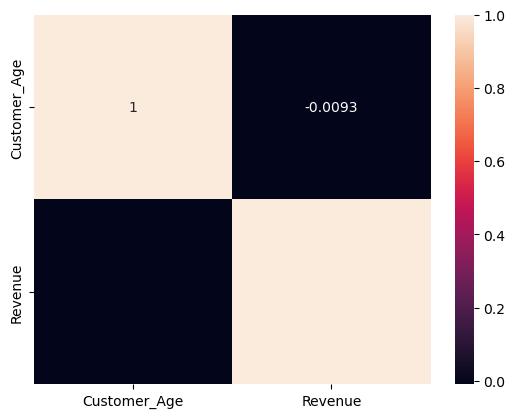

In [21]:
sns.heatmap(df[['Customer_Age','Revenue']].corr(), annot=True)